# Data Preprocessing

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [17]:
df = pd.read_csv('./Data/Data_AWS_141223', delimiter=',')
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M')
df.dropna(inplace=True)
df.set_index('Datetime', inplace=True)
df.sort_index(ascending=False, inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)
agg_functions = {'Total': 'median'}  #
print(df.head())

                      Total
Datetime                   
2023-12-14 17:26:00  1653.0
2023-12-14 17:25:00  1651.0
2023-12-14 17:24:00  1651.0
2023-12-14 17:23:00  1649.0
2023-12-14 17:22:00  1647.0


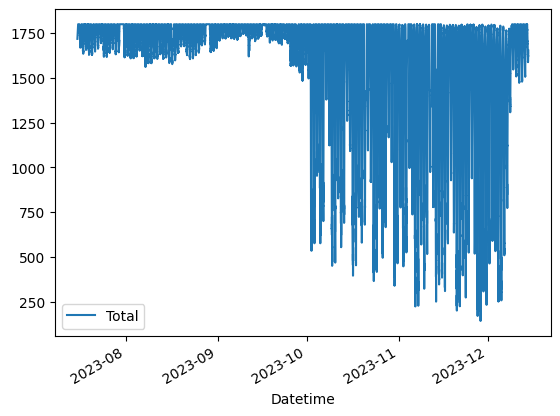

In [18]:
df.plot()
plt.show()

In [19]:
print(df.index.min(), df.index.max())

2023-07-15 17:08:00 2023-12-14 17:26:00


Summer data (start - 24/09/23) does not represent the term time trend of the data, so will omit due to limited data.

210527
109778


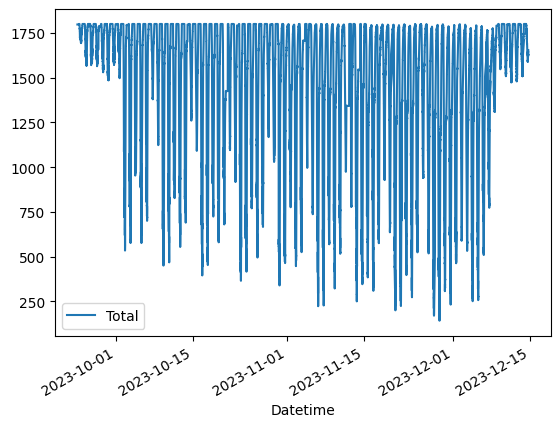

In [21]:
df_termTime = df[df.index >= '2023-09-24']
print(len(df))
print(len(df_termTime))
df_termTime.plot()
plt.show()

Will add day of week, and what period (summer, winter, induction week, Michaelmas term, Epiphany term and easter term) each date is, to be used as exogenous variables.

Will input dates manually, however can be trivially web-scrapped later.


In [ ]:
df.pcf_pl